<a href="https://colab.research.google.com/github/dgansen/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2/LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [3]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#Calculate mean
#(handles any size)
def mean(inp, dof=0):
  s = 0
  count = 0
  for num in inp:
    s+=num
    count+=1
  return s / (count - dof)

mean(sales)

3052.714285714286

In [4]:
#Variance
#(handles any size)
def variance(inp, dof=1):
  x_bar = mean(inp)
  dist = []
  for num in inp:
    dist.append(num - x_bar)
  distSq = []
  for num in dist:
    distSq.append(num**2)
  return mean(distSq, dof=dof)
variance(sales)

214387.90476190473

In [5]:
#Standard Deviation
#(handles any size)
def standev(inp):
  var = variance(inp)
  return var**0.5
standev(sales)

463.0204150595357

In [6]:
np.std(sales,ddof=1)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [8]:
cust = [127, 80, 105, 92, 120, 115, 93]
np.cov(sales, cust)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [18]:
standev(cust)

17.057326313123664

In [10]:
covar = np.cov(sales, cust)[0,1]
corr_coeff = covar / standev(cust) / standev(sales)
corr_coeff

0.9628339778148909

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url)
df.describe(include='object')

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1310,486,745
unique,1307,2,929,186,3,27,369
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,917,39,64


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1.0, 2.0)

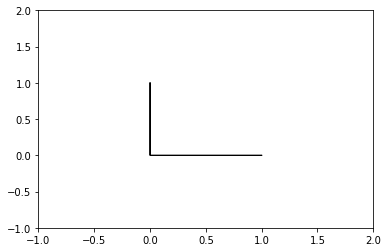

In [22]:
import matplotlib.pyplot as plt
i = [0, 1]
j = [1, 0]
plt.arrow(0,0,i[0],i[1])
plt.arrow(0,0,j[0],j[1])
plt.xlim(-1,2)
plt.ylim(-1,2)
#Orthogonal means they are at right angles

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [1]:
import numpy as np
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

np.dot(a,b)
#They are not because the dot product is not zero. 

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [4]:
c = np.array([2, -15, 6, 20])
np.linalg.norm(c) ** 2

665.0

In [5]:
np.dot(c,c)

665

In [9]:
c * c.T

array([  4, 225,  36, 400])

In [11]:
(c * c.T).sum()
#These are all different ways of squaring each element of the vector and summing them

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} 
= 7*\begin{bmatrix} 1\\0 \end{bmatrix} + 12*\begin{bmatrix} 0\\1 \end{bmatrix}
\end{align}

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix}
= 2*\begin{bmatrix} 1\\0\\0 \end{bmatrix} + 11*\begin{bmatrix} 0\\1\\0 \end{bmatrix} - 8*\begin{bmatrix} 0\\0\\1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [14]:
f = np.array([4,12,11,9,2])
f_unit = f / np.linalg.norm(f)
f_unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

(0.0, 5.0)

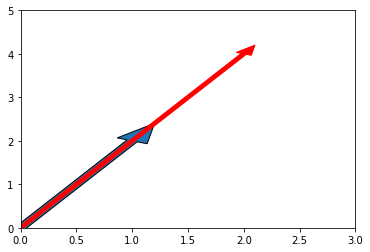

In [21]:
import matplotlib.pyplot as plt

v1 = [1, 2]
v2 = [2, 4]
plt.arrow(0,0,v1[0],v1[1],width=0.1)
plt.arrow(0,0,v2[0],v2[1],color='red',width=0.05)
plt.xlim(0,3)
plt.ylim(0,5)

(0.0, 5.0)

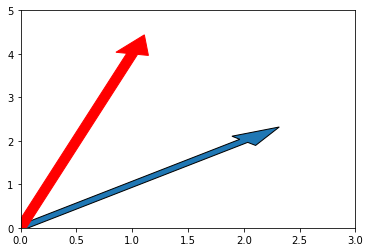

In [23]:
v1 = [2, 2]
v2 = [1, 4]
plt.arrow(0,0,v1[0],v1[1],width=0.1)
plt.arrow(0,0,v2[0],v2[1],color='red',width=0.1)
plt.xlim(0,3)
plt.ylim(0,5)


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [25]:
g = [1, 2]
h = [4, 8]
mat = np.array([g,h])

np.linalg.matrix_rank(mat)

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [26]:
l = [1,2,3]
m = [-1,0,7]
n = [4,8,2]
M = np.array([l,m,n])

np.linalg.matrix_rank(M)

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(0.0, 5.0)

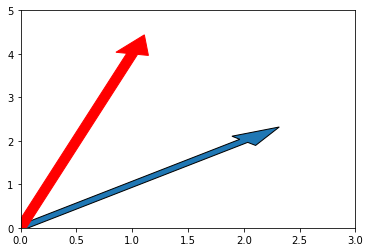

In [27]:
v1 = [2, 2]
v2 = [1, 4]
plt.arrow(0,0,v1[0],v1[1],width=0.1)
plt.arrow(0,0,v2[0],v2[1],color='red',width=0.1)
plt.xlim(0,3)
plt.ylim(0,5)

## 6.2 What does it mean to form a basis?

Any linearly independent set of vectors can provide a basis for n-dimensional space, where n is the number of such vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [28]:
P = np.array([[1,2,3], [-1,0,7], [4,8,2]])
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?

It tells the number of linearly independent rows, or span that matrix forms

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

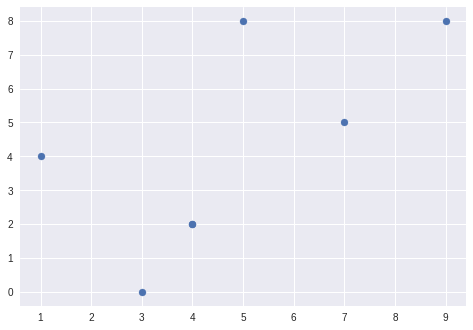

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()